# Tweets & User Info Plots

Loading previous data and create plots

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas -g

import re
from tqdm import tqdm
import yaml
import pandas as pd
import numpy as np
import watermark
import matplotlib.pyplot as plt
import seaborn as sns

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit
Git hash   : b15a3f632e9233ec78c35a8cbe1da876e727bfc5


### Constants

Modify these values to update the config file, the query or the output file.

In [2]:
TWEETS_FILE = "tweets-processed.csv"
TWITTER_USERS = "twitter_users.csv"

In [3]:
tweets_df = pd.read_csv(TWEETS_FILE, parse_dates=['created_at'])
users_df = pd.read_csv(TWITTER_USERS, parse_dates=['created_at'])

In [4]:
tweets_df.head(3)

,screen_name,location,id,source,favorite_count,favorited,lang,hashtags,created_at,text,tags,is_retweet,retweet_author,n_words,has_link,emoji_count,emojis
0,ONYXCONtruth,ATL & The Universe,446395993,Instagram,0,False,en,"[{'text': 'real', 'indices': [18, 23]}, {'text...",2019-07-04 22:57:55,Salute to all the that make POSSIBLE ️ https:/...,"['real', 'Artist', 'ONYXCON', 'popularArts', '...",False,NaN,63,True,1,‼
1,CassiniFrank,"Vancouver, British Columbia",997922612255703040,Twitter for iPhone,0,False,en,"[{'text': 'UK', 'indices': [47, 50]}, {'text':...",2019-07-04 22:57:47,Mighty chuffed to have our at ’s legendary @Fr...,"['UK', 'Premiere', 'London', 'WestEnd', 'Fright']",True,volition_movie,81,False,0,NaN
2,afriwomencinema,unknown,29717530,Twitter Web Client,0,False,en,"[{'text': 'Senegal', 'indices': [107, 115]}]",2019-07-04 22:57:42,FROM THE AFRICAN WOMEN IN CINEMA BLOG ARCHIVES...,['Senegal'],False,NaN,130,True,0,NaN


In [5]:
users_df.head(3)

,name,screen_name,id,lang,followers_count,location,created_at,statuses_count,friends_count,description
0,mohd akmal,cipanoss,631924707,NaN,3,NaN,2012-07-10 09:43:19,1,53,b''
1,basset bourouro,bassetbourouro,2184098312,NaN,0,NaN,2013-11-09 10:56:00,2,7,b''
2,سعود,SAUD9969,597529653,NaN,168,NaN,2012-06-02 14:16:50,11,524,b'\xd9\x85\xd8\xba\xd8\xb1\xd8\xaf \xd8\xb3\xd...


### Histogram of users by year in which the user was created:

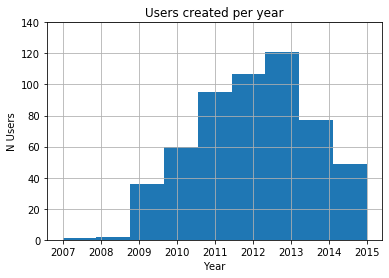

In [38]:
years = [k.year for k in users_df['created_at']]

n, bins, patches = plt.hist(years, bins = len(set(years)) )
plt.xlabel('Year')
plt.ylabel('N Users')
plt.title('Users created per year')
plt.ylim(0, 140)
plt.grid(True)
plt.show()

### Histogram of users by number of followers:

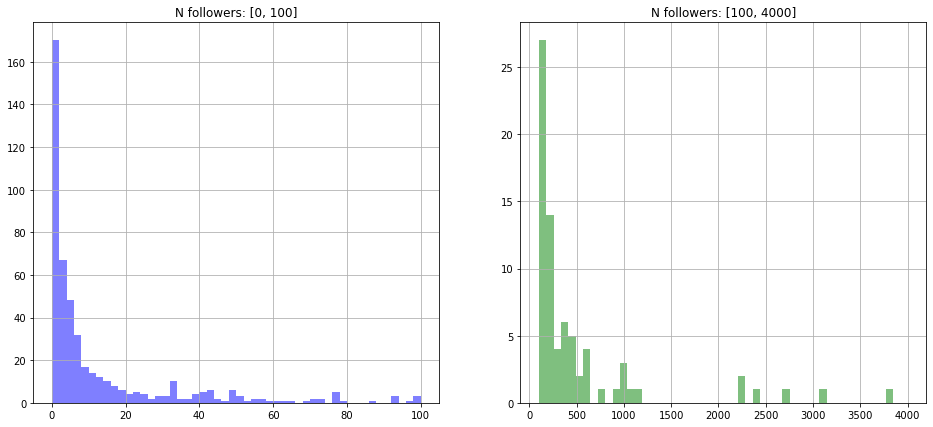

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))   # sharey='row'  (use this to set same axis at Y)
ax = ax.ravel() 
xlim = [[0, 100], [100, 4000]]
color = ['blue', 'green']

for idx, lim, c in zip(range(2), xlim, color):
    ax[idx].hist(users_df['followers_count'], bins=50, alpha=0.5, range=lim, color=c)
    ax[idx].set_title('N followers: {}'.format(lim))
    ax[idx].grid(which='both')

### Histogram of users by number of friends

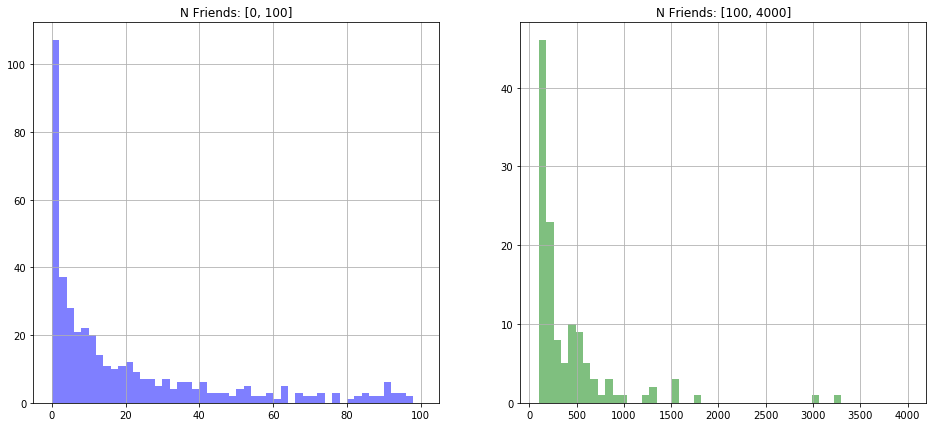

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))   # sharey='row'  (use this to set same axis at Y)
ax = ax.ravel() 
xlim = [[0, 100], [100, 4000]]
color = ['blue', 'green']

for idx, lim, c in zip(range(2), xlim, color):
    ax[idx].hist(users_df['friends_count'], bins=50, alpha=0.5, range=lim, color=c)
    ax[idx].set_title('N Friends: {}'.format(lim))
    ax[idx].grid(which='both')

### Number of words per tweet

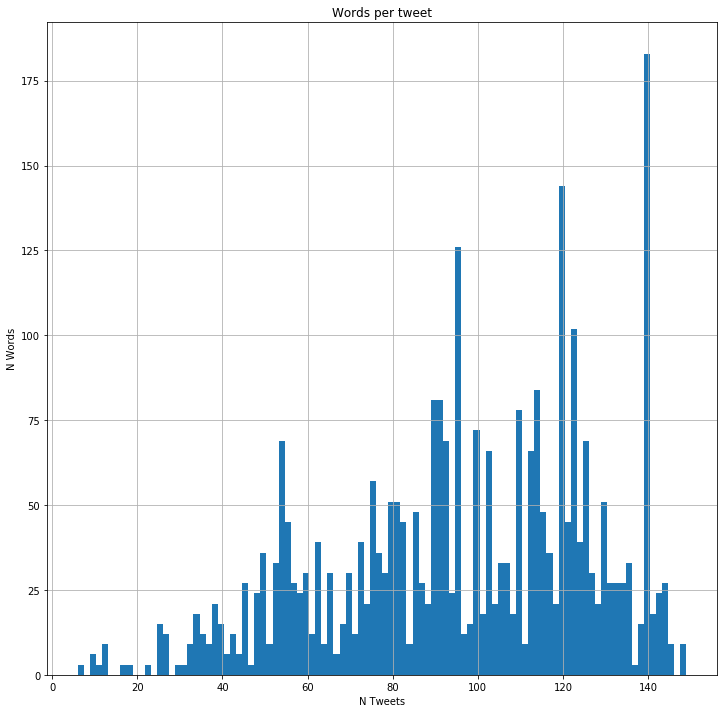

In [64]:
plt.figure(figsize=(12, 12))
n, bins, patches = plt.hist(tweets_df['n_words'], bins=100)
plt.xlabel('N Tweets')
plt.ylabel('N Words')
plt.title('Words per tweet')
plt.grid(True)

plt.show()

In [70]:
tweets_df['has_emoji'] = tweets_df.emoji_count > 0

In [82]:
t = tweets_df[['n_words', 'is_retweet', 'has_link', 'has_emoji']].astype(int).copy()

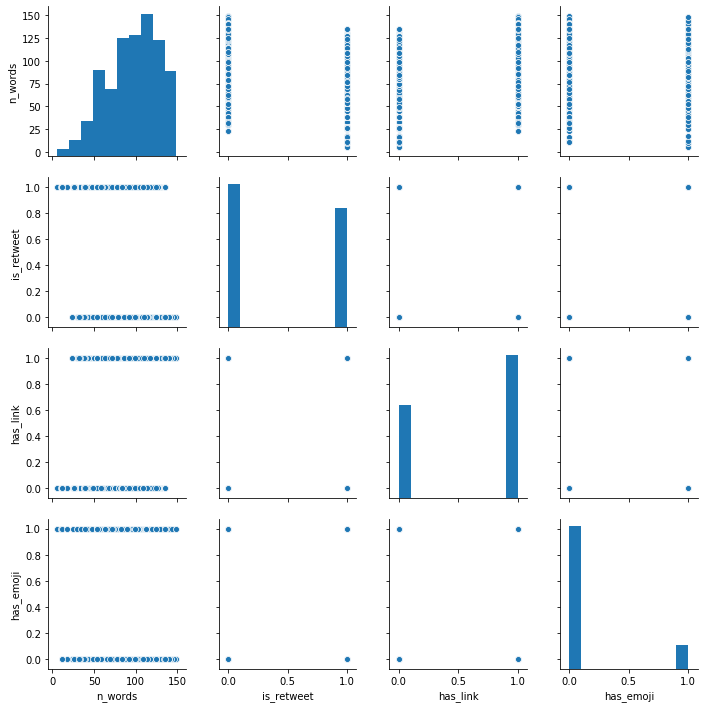

In [84]:
sns.pairplot(t)
# sns.plt.show()


In [73]:
type(t)

pandas.core.frame.DataFrame